In [2]:
import requests
import json
import time
import os
from datetime import datetime, timedelta

# GDELT DOC 2.0 API base URL
BASE_URL = 'https://api.gdeltproject.org/api/v2/doc/doc'

# List of artists to fetch articles for
artists = [
    "Kanye West", "Sabrina Carpenter", "Kendrick Lamar", "SZA",
    "Drake", "Chappell Roan", "Post Malone", "Lady Gaga",
    "Benson Boone", "Billie Eilish", "The Weeknd", "Gracie Abrams",
    "Teddy Swims", "Bad Bunny", "Ariana Grande",
    "Travis Scott", "Rihanna", "Beyoncé",
    "Bruno Mars", "Taylor Swift", "Charli XCX", "Justin Bieber", "Ed Sheeran", "Olivia Rodrigo"
]

# Date range: Jan 1 to December 31, 2024
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
interval_days = 2  # Fetch in 2-day windows

# Create output directory
output_dir = "gdelt_articles_jun_dec2024"
os.makedirs(output_dir, exist_ok=True)

# Helper to format date for GDELT
def gdelt_format(dt, end=False):
    return dt.strftime("%Y%m%d") + ("235959" if end else "000000")

# Fetch articles for a single artist
def fetch_articles_for_artist(artist):
    print(f"\nFetching articles for {artist}...")
    all_articles = []
    seen_urls = set()
    seen_titles = set()

    current = start_date
    while current < end_date:
        chunk_start = gdelt_format(current)
        chunk_end = gdelt_format(current + timedelta(days=interval_days), end=True)

        params = {
            'query': artist,
            'mode': 'artlist',
            'format': 'json',
            'maxrecords': 250,
            'sort': 'DateDesc',
            'startdatetime': chunk_start,
            'enddatetime': chunk_end
        }

        try:
            response = requests.get(BASE_URL, params=params)
            if response.status_code == 200:
                data = response.json()
                articles = data.get('articles', [])

                for item in articles:
                    if item.get('language', '').lower() != 'english':
                        continue
                    if item.get('sourcecountry', '').upper() not in ['UNITED STATES', 'UNITED KINGDOM']:
                        continue

                    url = item.get('url', '').strip()
                    title = item.get('title', '').strip().lower()

                    if not url or not title:
                        continue

                    if url in seen_urls or title in seen_titles:
                        continue

                    seen_urls.add(url)
                    seen_titles.add(title)

                    article = {
                        'seendate': item.get('seendate', ''),
                        'url': url,
                        'title': item.get('title', ''),
                        'sourcecountry': item.get('sourcecountry', ''),
                        'language': item.get('language', ''),
                        'domain': item.get('domain', '')
                    }
                    all_articles.append(article)

            else:
                print(f"Error {response.status_code}: {response.text}")

        except Exception as e:
            print(f"Exception during request: {e}")

        current += timedelta(days=interval_days)
        time.sleep(1)

    print(f"Saved {len(all_articles)} articles for {artist}")
    return all_articles

# Loop through each artist and save data
for artist in artists:
    articles = fetch_articles_for_artist(artist)
    safe_name = artist.lower().replace(" ", "_").replace(",", "").replace("é", "e")
    filename = f"{output_dir}/{safe_name}.json"
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(articles, f, indent=4)
    time.sleep(2)  # Respect API rate limits

print("✅ All articles fetched and saved from June to December 2024!")



Fetching articles for Kanye West...
Saved 7716 articles for Kanye West

Fetching articles for Sabrina Carpenter...
Saved 6309 articles for Sabrina Carpenter

Fetching articles for Kendrick Lamar...
Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Error 429: Please limit requests to one every 5 seconds or contact kalev.leetaru5@gmail.com for larger queries.


Err

KeyboardInterrupt: 

# Importing Data for all the Artists

In [21]:
import requests
import json
import time
import os
from datetime import datetime, timedelta

# GDELT DOC 2.0 API base URL
BASE_URL = 'https://api.gdeltproject.org/api/v2/doc/doc'

# List of artists to fetch articles for
artists = [
    "Playboi Carti",
]

# Date range: Jan 1 to December 31, 2024
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
interval_days = 2  # Fetch in 2-day windows

# Create output directory
output_dir = "gdelt_articles_jun_dec2024"
os.makedirs(output_dir, exist_ok=True)

# Helper to format date for GDELT
def gdelt_format(dt, end=False):
    return dt.strftime("%Y%m%d") + ("235959" if end else "000000")

# Fetch articles for a single artist
def fetch_articles_for_artist(artist):
    print(f"\nFetching articles for {artist}...")
    all_articles = []
    seen_urls = set()
    seen_titles = set()

    current = start_date
    while current < end_date:
        chunk_start = gdelt_format(current)
        chunk_end = gdelt_format(current + timedelta(days=interval_days), end=True)

        params = {
            'query': artist,
            'mode': 'artlist',
            'format': 'json',
            'maxrecords': 250,
            'sort': 'DateDesc',
            'startdatetime': chunk_start,
            'enddatetime': chunk_end
        }

        try:
            response = requests.get(BASE_URL, params=params)
            if response.status_code == 200:
                data = response.json()
                articles = data.get('articles', [])

                for item in articles:
                    if item.get('language', '').lower() != 'english':
                        continue
                    if item.get('sourcecountry', '').upper() not in ['UNITED STATES', 'UNITED KINGDOM']:
                        continue

                    url = item.get('url', '').strip()
                    title = item.get('title', '').strip().lower()

                    if not url or not title:
                        continue

                    if url in seen_urls or title in seen_titles:
                        continue

                    seen_urls.add(url)
                    seen_titles.add(title)

                    article = {
                        'seendate': item.get('seendate', ''),
                        'url': url,
                        'title': item.get('title', ''),
                        'sourcecountry': item.get('sourcecountry', ''),
                        'language': item.get('language', ''),
                        'domain': item.get('domain', '')
                    }
                    all_articles.append(article)

            else:
                print(f"Error {response.status_code}: {response.text}")

        except Exception as e:
            print(f"Exception during request: {e}")

        current += timedelta(days=interval_days)
        time.sleep(1)

    print(f"Saved {len(all_articles)} articles for {artist}")
    return all_articles

# Loop through each artist and save data
for artist in artists:
    articles = fetch_articles_for_artist(artist)
    safe_name = artist.lower().replace(" ", "_").replace(",", "").replace("é", "e")
    filename = f"{output_dir}/{safe_name}.json"
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(articles, f, indent=4)
    time.sleep(2)  # Respect API rate limits

print("✅ All articles fetched and saved from June to December 2024!")



Fetching articles for Playboi Carti...
Saved 1094 articles for Playboi Carti
✅ All articles fetched and saved from June to December 2024!


# Turning them into txt files

In [4]:
import os
import json
import requests
from bs4 import BeautifulSoup

# ✅ Update these paths
json_folder = 'gdelt_articles_jun_dec2024'
output_folder = 'articles_2024'

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

# Function to extract article text from a URL
def extract_article_text(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            paragraphs = soup.find_all('p')
            text = '\n'.join(p.get_text() for p in paragraphs if p.get_text(strip=True))
            return text.strip()
        else:
            print(f"⚠️ Status {response.status_code} for URL: {url}")
    except Exception as e:
        print(f"❌ Error fetching {url}: {e}")
    return None

# Process each artist's JSON file
json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

for json_file in json_files:
    artist_name = json_file.replace('.json', '')
    artist_folder = os.path.join(output_folder, artist_name)
    os.makedirs(artist_folder, exist_ok=True)

    print(f"\n🎤 Processing artist: {artist_name}")
    with open(os.path.join(json_folder, json_file), 'r', encoding='utf-8') as f:
        all_articles = json.load(f)

    count = 1
    for article in all_articles:
        url = article.get('url', '')
        if not url:
            continue

        text = extract_article_text(url)
        if text:
            file_path = os.path.join(artist_folder, f'{count}.txt')
            with open(file_path, 'w', encoding='utf-8') as out_file:
                out_file.write(text)
            print(f"✅ Saved {artist_name} article #{count}")
            count += 1



🎤 Processing artist: taylor_swift
✅ Saved taylor_swift article #1
⚠️ Status 403 for URL: https://www.931kmkt.com/syndicated-article/?id=1541951
⚠️ Status 403 for URL: https://www.khop.com/news/taylor-swift-breaks-elvis-record-for-most-weeks-atop-billboard-200/
⚠️ Status 451 for URL: https://www.ketv.com/article/golden-globes-movie-predictions/46275981
⚠️ Status 451 for URL: https://www.wyff4.com/article/two-lexington-men-arrested-child-sex-charges-south-carolina/46277830
❌ Error fetching https://www.idahostatesman.com/news/business/article283802288.html: HTTPSConnectionPool(host='www.idahostatesman.com', port=443): Read timed out. (read timeout=10)
❌ Error fetching https://www.froggy929.com/2024/01/03/sketch-like-a-pro-at-the-country-music-hall-of-fame-and-museum/: HTTPSConnectionPool(host='www.froggy929.com', port=443): Max retries exceeded with url: /2024/01/03/sketch-like-a-pro-at-the-country-music-hall-of-fame-and-museum/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSCon

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


✅ Saved taylor_swift article #3235
✅ Saved taylor_swift article #3236
✅ Saved taylor_swift article #3237
✅ Saved taylor_swift article #3238
✅ Saved taylor_swift article #3239
✅ Saved taylor_swift article #3240
✅ Saved taylor_swift article #3241
✅ Saved taylor_swift article #3242
⚠️ Status 403 for URL: https://www.orangeobserver.com/news/2024/mar/28/2024-arts-summer-camps-in-central-florida/
⚠️ Status 403 for URL: https://www.scotsman.com/business/artificial-intelligence-offers-scottish-firms-huge-opportunities-4573880
✅ Saved taylor_swift article #3243
✅ Saved taylor_swift article #3244
✅ Saved taylor_swift article #3245
✅ Saved taylor_swift article #3246
✅ Saved taylor_swift article #3247
✅ Saved taylor_swift article #3248
✅ Saved taylor_swift article #3249
✅ Saved taylor_swift article #3250
⚠️ Status 451 for URL: https://www.channel3000.com/news/national-and-world-news/ghanaian-afro-dancehall-star-stonebwoy-records-at-bob-marley-s-tuff-gong-studios-inspired-to/article_e36deae8-c68d-5

KeyboardInterrupt: 

# Max 2500 Per Artist

In [ ]:
import os
import json
import requests
import random
from bs4 import BeautifulSoup

# Configuration
json_folder = 'gdelt_articles_jun_dec2024'
output_folder = 'articles_2024'
max_per_artist = 2500
skip_artists = ['taylor_swift', 'sza', 'post_malone', 'drake', 'beyonce', 'ariana_grande', 'travis_scott', 'benson_boone', 'bruno_mars']  # already processed

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

# Function to extract article text
def extract_article_text(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            paragraphs = soup.find_all('p')
            text = '\n'.join(p.get_text() for p in paragraphs if p.get_text(strip=True))
            return text.strip()
        else:
            print(f"⚠️ Status {response.status_code} for URL: {url}")
    except Exception as e:
        print(f"❌ Error fetching {url}: {e}")
    return None

# Process JSON files
json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

for json_file in json_files:
    artist_name = json_file.replace('.json', '')
    if artist_name in skip_artists:
        print(f"⏩ Skipping {artist_name}")
        continue

    artist_folder = os.path.join(output_folder, artist_name)
    os.makedirs(artist_folder, exist_ok=True)

    print(f"\n🎤 Processing: {artist_name}")
    with open(os.path.join(json_folder, json_file), 'r', encoding='utf-8') as f:
        all_articles = json.load(f)

    # Shuffle articles randomly and pick up to max_per_artist
    random.shuffle(all_articles)
    selected_articles = all_articles[:max_per_artist]

    count = 1
    for article in selected_articles:
        url = article.get('url', '')
        if not url:
            continue

        text = extract_article_text(url)
        if text:
            file_path = os.path.join(artist_folder, f'{count}.txt')
            with open(file_path, 'w', encoding='utf-8', errors='ignore') as out_file:
                out_file.write(text)

            print(f"✅ Saved {artist_name} article #{count}")
            count += 1

        if count > max_per_artist:
            break

print("🎉 All selected articles saved!")


# Filtering for minimum 2 mentiones

In [10]:
import os
import re
import shutil

# Source and destination folders
source_folder = 'articles_2024'  # folder with the unfiltered articles
destination_folder = 'filtered_articles_2024'  # where filtered results go

# Ensure the output base folder exists
os.makedirs(destination_folder, exist_ok=True)

# Loop over each artist subfolder
for artist_folder in os.listdir(source_folder):
    artist_path = os.path.join(source_folder, artist_folder)
    if not os.path.isdir(artist_path):
        continue

    dest_artist_path = os.path.join(destination_folder, artist_folder)
    os.makedirs(dest_artist_path, exist_ok=True)

    # Construct possible name variants
    artist_name = artist_folder.replace('_', ' ')
    name_parts = artist_name.split()

    full_name_pattern = re.compile(re.escape(artist_name), re.IGNORECASE)
    first_name_pattern = re.compile(r'\b' + re.escape(name_parts[0]) + r'\b', re.IGNORECASE)
    last_name_pattern = (
        re.compile(r'\b' + re.escape(name_parts[-1]) + r'\b', re.IGNORECASE) if len(name_parts) > 1 else None
    )

    print(f"🔍 Filtering files for {artist_name}...")

    # Loop through all .txt files
    for file in os.listdir(artist_path):
        if not file.endswith('.txt'):
            continue

        file_path = os.path.join(artist_path, file)

        with open(file_path, 'r', encoding='utf-8') as f:
            content = f.read().lower()

        # Count mentions
        full_count = len(full_name_pattern.findall(content))
        first_count = len(first_name_pattern.findall(content))
        last_count = len(last_name_pattern.findall(content)) if last_name_pattern else 0

        total_mentions = full_count + (first_count if full_count == 0 else 0) + (last_count if full_count == 0 else 0)

        # Save only if mentions ≥ 2
        if total_mentions >= 2:
            shutil.copy(file_path, os.path.join(dest_artist_path, file))
        else:
            print(f"🗑️ Skipped: {file} (only {total_mentions} mention(s))")

print("✅ Done! Filtered articles saved in:", destination_folder)


🔍 Filtering files for benson boone...
🗑️ Skipped: 289.txt (only 0 mention(s))
🗑️ Skipped: 276.txt (only 0 mention(s))
🗑️ Skipped: 510.txt (only 1 mention(s))
🗑️ Skipped: 921.txt (only 1 mention(s))
🗑️ Skipped: 935.txt (only 0 mention(s))
🗑️ Skipped: 712.txt (only 0 mention(s))
🗑️ Skipped: 869.txt (only 1 mention(s))
🗑️ Skipped: 15.txt (only 1 mention(s))
🗑️ Skipped: 114.txt (only 1 mention(s))
🗑️ Skipped: 666.txt (only 1 mention(s))
🗑️ Skipped: 896.txt (only 0 mention(s))
🗑️ Skipped: 882.txt (only 1 mention(s))
🗑️ Skipped: 470.txt (only 1 mention(s))
🗑️ Skipped: 302.txt (only 1 mention(s))
🗑️ Skipped: 464.txt (only 1 mention(s))
🗑️ Skipped: 458.txt (only 1 mention(s))
🗑️ Skipped: 459.txt (only 1 mention(s))
🗑️ Skipped: 303.txt (only 1 mention(s))
🗑️ Skipped: 471.txt (only 0 mention(s))
🗑️ Skipped: 317.txt (only 1 mention(s))
🗑️ Skipped: 883.txt (only 1 mention(s))
🗑️ Skipped: 667.txt (only 1 mention(s))
🗑️ Skipped: 115.txt (only 0 mention(s))
🗑️ Skipped: 673.txt (only 1 mention(s))
🗑️ 

In [9]:
import os

# Path to the filtered articles folder
filtered_folder = 'filtered_articles_2024'

# Dictionary to store counts
article_counts = {}

# Loop through each artist's folder
for artist_folder in os.listdir(filtered_folder):
    artist_path = os.path.join(filtered_folder, artist_folder)
    if os.path.isdir(artist_path):
        txt_files = [f for f in os.listdir(artist_path) if f.endswith('.txt')]
        article_counts[artist_folder] = len(txt_files)

# Print the results
print("📊 Article counts per artist:")
for artist, count in sorted(article_counts.items(), key=lambda x: x[0]):
    print(f"{artist.replace('_', ' ').title():<20}: {count} articles")

# Optional: Total count
total_articles = sum(article_counts.values())
print(f"\n🧮 Total filtered articles: {total_articles}")


📊 Article counts per artist:
Ariana Grande       : 412 articles
Bad Bunny           : 910 articles
Benson Boone        : 255 articles
Beyonce             : 872 articles
Billie Eilish       : 408 articles
Bruno Mars          : 432 articles
Chappell Roan       : 573 articles
Charli Xcx          : 631 articles
Drake               : 775 articles
Gracie Abrams       : 227 articles
Justin Bieber       : 502 articles
Kanye West          : 581 articles
Kendrick Lamar      : 736 articles
Lady Gaga           : 468 articles
Olivia Rodrigo      : 494 articles
Playboi Carti       : 243 articles
Post Malone         : 739 articles
Rihanna             : 702 articles
Sabrina Carpenter   : 570 articles
Selena Gomez        : 456 articles
Sza                 : 733 articles
Taylor Swift        : 1396 articles
Teddy Swims         : 199 articles
The Weeknd          : 672 articles
Travis Scott        : 909 articles

🧮 Total filtered articles: 14895


# BERT on the text articles

In [17]:
import os
import re
import nltk
from tqdm import tqdm
from bertopic import BERTopic
from nltk.corpus import stopwords

nltk.download('stopwords')

# === CONFIGURATION ===
base_path = 'filtered_articles_2024'  # Folder containing artist subfolders with .txt files

artist_gender_map = {
    "kanye_west": "male", "sabrina_carpenter": "female", "kendrick_lamar": "male", "sza": "female",
    "drake": "male", "chappell_roan": "female", "post_malone": "male", "lady_gaga": "female",
    "benson_boone": "male", "billie_eilish": "female", "the_weeknd": "male", "gracie_abrams": "female",
    "teddy_swims": "male", "bad_bunny": "male", "ariana_grande": "female", "travis_scott": "male",
    "rihanna": "female", "beyonce": "female", "bruno_mars": "male", "taylor_swift": "female",
    "charli_xcx": "female", "justin_bieber": "male", "ed_sheeran": "male", "olivia_rodrigo": "female",
    "playboi_carti": "male", "selena_gomez": "female"
}

import calendar

# Default stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Add artist name parts
name_parts = set()
for artist in artist_gender_map:
    parts = artist.split("_")
    name_parts.update(parts)
    name_parts.add(" ".join(parts))

# Add filler words and general noise
custom_stopwords = {
    "like", "yeah", "know", "dont", "really", "got", "say", "said", "just",
    "one", "also", "people", "thing", "stuff", "thats", "im", "youre", "think",
    "get", "see", "going", "even", "make", "way", "back", "day", "something",
    "show", "come", "could", "would", "police", "county", "adds", "kinder", "switch", "mode", "apr", "tie"
}

# Add all month names
month_stopwords = {month.lower() for month in calendar.month_name if month}

# Combine all
stop_words.update(custom_stopwords)
stop_words.update(month_stopwords)
stop_words.update(name_parts)

# Updated preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


# === Load and preprocess documents ===
def load_documents_by_gender(base_path, artist_gender_map):
    gender_docs = {'female': [], 'male': []}

    print("📂 Loading and preprocessing articles by gender...")
    for artist_folder in tqdm(os.listdir(base_path)):
        artist_path = os.path.join(base_path, artist_folder)
        if not os.path.isdir(artist_path):
            continue

        gender = artist_gender_map.get(artist_folder, None)
        if gender not in ['male', 'female']:
            continue

        for file in os.listdir(artist_path):
            if file.endswith('.txt'):
                try:
                    with open(os.path.join(artist_path, file), 'r', encoding='utf-8') as f:
                        raw = f.read()
                        cleaned = preprocess(raw)
                        if cleaned.strip():
                            gender_docs[gender].append(cleaned)
                except:
                    continue
    return gender_docs

gender_docs = load_documents_by_gender(base_path, artist_gender_map)

# === Fit separate BERTopic models ===
print("\n🧠 Fitting BERTopic model on FEMALE articles...")
female_model = BERTopic(language="english", verbose=True)
female_topics, _ = female_model.fit_transform(gender_docs['female'])

print("\n🧠 Fitting BERTopic model on MALE articles...")
male_model = BERTopic(language="english", verbose=True)
male_topics, _ = male_model.fit_transform(gender_docs['male'])

# === Show top topics per gender ===
from collections import Counter

def show_top_topics(model, topics, label):
    print(f"\n📊 Top topics for {label.upper()}:")
    top_ids = Counter(topics).most_common(5)
    for topic_id, count in top_ids:
        words = model.get_topic(topic_id)
        if words:
            keywords = ", ".join([word for word, _ in words[:10]])
            print(f"  Topic {topic_id}: {keywords}")

show_top_topics(female_model, female_topics, "female")
show_top_topics(male_model, male_topics, "male")

# === Optional: visualize each model ===
# female_model.visualize_topics().show()
# male_model.visualize_topics().show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saachisabnis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📂 Loading and preprocessing articles by gender...


100%|██████████| 25/25 [00:07<00:00,  3.34it/s]
2025-05-04 15:10:27,127 - BERTopic - Embedding - Transforming documents to embeddings.



🧠 Fitting BERTopic model on FEMALE articles...


Batches:   0%|          | 0/225 [00:00<?, ?it/s]

2025-05-04 15:11:53,260 - BERTopic - Embedding - Completed ✓
2025-05-04 15:11:53,261 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-04 15:11:58,216 - BERTopic - Dimensionality - Completed ✓
2025-05-04 15:11:58,219 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-04 15:11:58,420 - BERTopic - Cluster - Completed ✓
2025-05-04 15:11:58,436 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-04 15:12:02,232 - BERTopic - Representation - Completed ✓
2025-05-04 15:12:05,107 - BERTopic - Embedding - Transforming documents to embeddings.



🧠 Fitting BERTopic model on MALE articles...


Batches:   0%|          | 0/218 [00:00<?, ?it/s]

2025-05-04 15:14:37,479 - BERTopic - Embedding - Completed ✓
2025-05-04 15:14:37,484 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-04 15:14:44,189 - BERTopic - Dimensionality - Completed ✓
2025-05-04 15:14:44,193 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-04 15:14:44,442 - BERTopic - Cluster - Completed ✓
2025-05-04 15:14:44,457 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-04 15:14:49,667 - BERTopic - Representation - Completed ✓



📊 Top topics for FEMALE:
  Topic -1: ria, mia, like, yeah, think, know, dont, really, im, thats
  Topic 0: harris, trump, biden, president, election, campaign, kamala, vote, presidential, political
  Topic 1: pm, fort, myers, cape, tours, presents, tickets, 730, blvd, performs
  Topic 2: kelce, chiefs, game, nfl, kansas, bowl, kelces, super, jason, football
  Topic 3: wicked, cynthia, erivo, elphaba, glinda, broadway, oz, film, musical, wizard

📊 Top topics for MALE:
  Topic -1: program, assistance, jr, reserve, payment, michael, annual, joseph, john, one
  Topic 0: hailey, baby, instagram, biebers, baldwin, haileys, pregnancy, shared, couple, rhode
  Topic 1: trump, biden, election, president, campaign, trumps, said, washington, white, people
  Topic 2: super, bowl, ads, game, chiefs, kelce, ad, february, overtime, commercials
  Topic 3: drakes, diss, drizzy, track, lamars, metro, rap, verse, ups, beef


In [18]:
# View all topics with the top keywords
topic_info = topic_model.get_topic_info()
for _, row in topic_info.iterrows():
    topic_id = row["Topic"]
    keywords = topic_model.get_topic(topic_id)
    if keywords:
        keywords_str = ", ".join([word for word, _ in keywords[:10]])
        print(f"Topic {topic_id}: {keywords_str}")


Topic -1: ria, mia, yeah, like, think, bon, jovi, know, dont, album
Topic 0: like, sort, annie, people, mean, know, sketch, show, something, cast
Topic 1: stage, band, crowd, fort, set, myers, festival, presents, singer, tickets
Topic 2: hailey, baby, instagram, haileys, baldwin, biebers, pregnancy, couple, shared, rhode
Topic 3: trump, harris, biden, president, campaign, election, kamala, trumps, washington, brat
Topic 4: brat, summer, remix, lorde, xcxs, album, green, troye, girl, charlis
Topic 5: bowl, super, game, chiefs, ads, overtime, kelce, february, commercials, football
Topic 6: joker, folie, deux, phillips, arthur, phoenix, joaquin, film, sequel, todd
Topic 7: kourtney, kardashian, barker, khloe, rocky, kim, kylie, kardashians, disick, penelope
Topic 8: chart, top, charts, weeks, hot, week, billboard, 100, song, latest
Topic 9: vmas, billboard, marriott, awards, 911, mtv, award, entertainment, megan, bonvoy
Topic 10: police, december, january, april, november, october, august

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saachisabnis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📂 Loading and preprocessing articles...


100%|██████████| 25/25 [00:07<00:00,  3.47it/s]
2025-05-04 16:39:43,778 - BERTopic - Embedding - Transforming documents to embeddings.



🧠 Fitting BERTopic model on FEMALE articles...


Batches:   0%|          | 0/225 [00:00<?, ?it/s]

2025-05-04 16:41:09,597 - BERTopic - Embedding - Completed ✓
2025-05-04 16:41:09,603 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-04 16:41:15,059 - BERTopic - Dimensionality - Completed ✓
2025-05-04 16:41:15,066 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-04 16:41:15,274 - BERTopic - Cluster - Completed ✓
2025-05-04 16:41:15,289 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-04 16:41:18,988 - BERTopic - Representation - Completed ✓
2025-05-04 16:41:21,748 - BERTopic - Embedding - Transforming documents to embeddings.



🧠 Fitting BERTopic model on MALE articles...


Batches:   0%|          | 0/218 [00:00<?, ?it/s]

2025-05-04 16:42:46,383 - BERTopic - Embedding - Completed ✓
2025-05-04 16:42:46,390 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-04 16:42:51,999 - BERTopic - Dimensionality - Completed ✓
2025-05-04 16:42:52,005 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-04 16:42:52,227 - BERTopic - Cluster - Completed ✓
2025-05-04 16:42:52,244 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-04 16:42:56,565 - BERTopic - Representation - Completed ✓



📊 Top topics for FEMALE:
  Topic 0: fashion brand appointed says brands le director creators pere collection
  Topic 1: trump harris biden president election kamala campaign vote presidential brat
  Topic 2: finneas grammys kind awards skinny hard song ocean album night
  Topic 3: joker folie deux phillips arthur phoenix joaquin film harley todd
  Topic 4: kelce chiefs kansas game kelces jason bowl super relationship nfl
  Topic 5: country beyonc winner cowboy carter nominations album year music song
  Topic 6: rocky aap rza riot rockys sons rapper rihannas fenty two
  Topic 7: billboard vmas marriott mtv awards entertainment bonvoy megan bbmas video
  Topic 8: wicked cynthia elphaba erivo glinda oz chu broadway film witch
  Topic 9: hair beauty fenty blonde bangs look products curls makeup natural
  Topic 10: year nominations grammy album grammys beyonc artist best nominated category
  Topic 11: brian eyes cantor 27 2025 dark light email brians briancantoratheadlineplanetcom
  Topic 

In [10]:
!pip uninstall numpy -y
!pip install "numpy<2.0"
!pip install --force-reinstall pandas scipy scikit-learn bertopic


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.1 MB/s eta 0:00:00
  Using cached bertopic-0.17.0-py3-none-any.whl.metadata (23 kB)
  Using cached numpy-2.2.5-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached hdbscan-0.8.40-cp312-cp312-macosx_10_13_universal2.whl.metadata (15 kB)
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
     ━━━━

# Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saachisabnis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Processing artists:   0%|          | 0/25 [00:00<?, ?it/s]

Reading artist: benson_boone


Processing artists:   4%|▍         | 1/25 [00:00<00:16,  1.44it/s]

Reading artist: justin_bieber


Processing artists:   8%|▊         | 2/25 [00:01<00:12,  1.80it/s]

Reading artist: travis_scott


Processing artists:  12%|█▏        | 3/25 [00:02<00:21,  1.03it/s]

Reading artist: lady_gaga


Processing artists:  16%|█▌        | 4/25 [00:03<00:23,  1.13s/it]

Reading artist: charli_xcx


Processing artists:  20%|██        | 5/25 [00:04<00:19,  1.05it/s]

Reading artist: the_weeknd


Processing artists:  24%|██▍       | 6/25 [00:05<00:15,  1.22it/s]

Reading artist: gracie_abrams


Processing artists:  28%|██▊       | 7/25 [00:06<00:17,  1.06it/s]

Reading artist: playboi_carti


Processing artists:  32%|███▏      | 8/25 [00:06<00:12,  1.38it/s]

Reading artist: teddy_swims


Processing artists:  36%|███▌      | 9/25 [00:07<00:13,  1.18it/s]

Reading artist: billie_eilish


Processing artists:  40%|████      | 10/25 [00:22<01:18,  5.23s/it]

Reading artist: kanye_west


Processing artists:  44%|████▍     | 11/25 [00:23<00:52,  3.76s/it]

Reading artist: selena_gomez


Processing artists:  48%|████▊     | 12/25 [00:23<00:35,  2.75s/it]

Reading artist: sabrina_carpenter


Processing artists:  52%|█████▏    | 13/25 [00:45<01:41,  8.44s/it]

Reading artist: chappell_roan


Processing artists:  56%|█████▌    | 14/25 [00:47<01:13,  6.68s/it]

Reading artist: bruno_mars


Processing artists:  60%|██████    | 15/25 [00:52<01:01,  6.15s/it]

Reading artist: ariana_grande


Processing artists:  64%|██████▍   | 16/25 [00:53<00:40,  4.49s/it]

Reading artist: sza


Processing artists:  68%|██████▊   | 17/25 [00:54<00:27,  3.47s/it]

Reading artist: post_malone


Processing artists:  72%|███████▏  | 18/25 [00:55<00:18,  2.66s/it]

Reading artist: olivia_rodrigo


Processing artists:  76%|███████▌  | 19/25 [00:55<00:12,  2.07s/it]

Reading artist: bad_bunny


Processing artists:  80%|████████  | 20/25 [01:00<00:14,  2.84s/it]

Reading artist: rihanna


Processing artists:  84%|████████▍ | 21/25 [01:01<00:08,  2.13s/it]

Reading artist: beyonce


Processing artists:  88%|████████▊ | 22/25 [01:01<00:04,  1.66s/it]

Reading artist: kendrick_lamar


Processing artists:  92%|█████████▏| 23/25 [01:03<00:03,  1.64s/it]

Reading artist: drake


Processing artists:  96%|█████████▌| 24/25 [01:04<00:01,  1.50s/it]

Reading artist: taylor_swift


Processing artists: 100%|██████████| 25/25 [01:04<00:00,  2.60s/it]


Average Sentiment by Gender:
             neg       neu       pos  compound
gender                                        
female  0.041125  0.830295  0.128577  0.882233
male    0.046382  0.840385  0.113227  0.706107


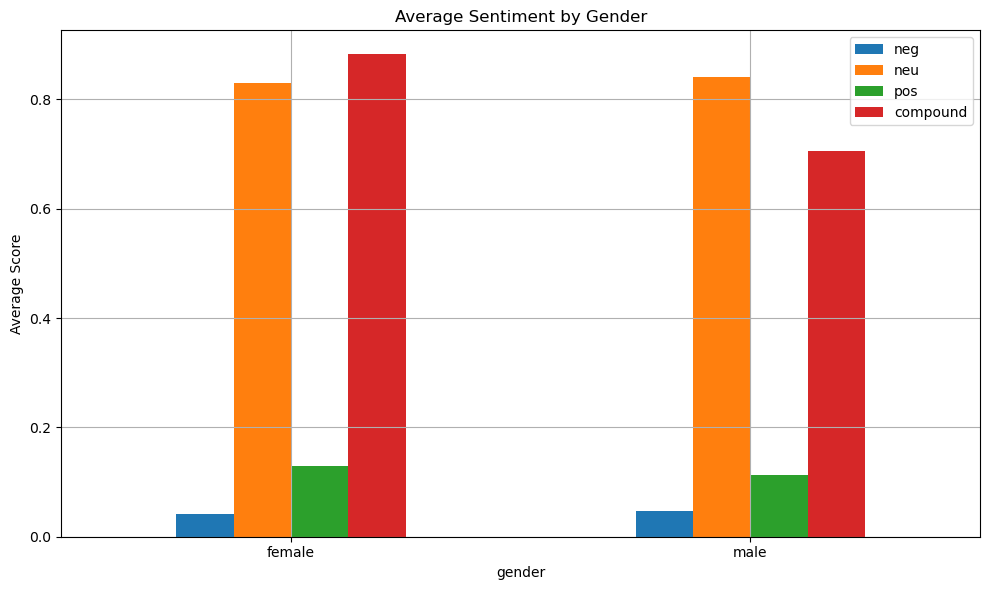

In [5]:
# Imports
import os
import pandas as pd
import random
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
import matplotlib.pyplot as plt

# Download VADER lexicon
download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# === CONFIGURATION ===

# Path to your main folder
base_folder = "filtered_articles_2024"

# Artist gender map (example — extend as needed)
artist_genders = {
    "kanye_west": "male", "sabrina_carpenter": "female", "kendrick_lamar": "male", "sza": "female",
    "drake": "male", "chappell_roan": "female", "post_malone": "male", "lady_gaga": "female",
    "benson_boone": "male", "billie_eilish": "female", "the_weeknd": "male", "gracie_abrams": "female",
    "teddy_swims": "male", "bad_bunny": "male", "ariana_grande": "female", "travis_scott": "male",
    "rihanna": "female", "beyonce": "female", "bruno_mars": "male", "taylor_swift": "female",
    "charli_xcx": "female", "justin_bieber": "male", "ed_sheeran": "male", "olivia_rodrigo": "female",
    "playboi_carti": "male", "selena_gomez": "female"
}

# === PROCESSING ===

# List to store all data
data = []

# Walk through each artist folder
for artist in tqdm(os.listdir(base_folder), desc="Processing artists"):
    print(f"Reading artist: {artist}")
    artist_path = os.path.join(base_folder, artist)
    if not os.path.isdir(artist_path):
        continue

    gender = artist_genders.get(artist.lower(), "unknown")

    # Sample up to N files
    N = 50
    all_files = [f for f in os.listdir(artist_path) if f.endswith(".txt")]
    sampled_files = random.sample(all_files, min(N, len(all_files)))

    for fname in sampled_files:
        file_path = os.path.join(artist_path, fname)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
                sentiment = sia.polarity_scores(text)

                data.append({
                    "artist": artist,
                    "gender": gender,
                    "file": fname,
                    "neg": sentiment["neg"],
                    "neu": sentiment["neu"],
                    "pos": sentiment["pos"],
                    "compound": sentiment["compound"]
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# === DATAFRAME CREATION ===

df = pd.DataFrame(data)

# === ANALYSIS ===

# Basic summary by gender
summary = df.groupby("gender")[["neg", "neu", "pos", "compound"]].mean()
print("Average Sentiment by Gender:")
print(summary)

# === VISUALIZATION ===

summary.plot(kind="bar", figsize=(10,6), title="Average Sentiment by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()





Average Sentiment by Artist:
                       neg      neu      pos  compound
artist                                                
chappell_roan      0.04230  0.82708  0.13058  0.973416
olivia_rodrigo     0.03660  0.83646  0.12692  0.945320
sabrina_carpenter  0.03236  0.83620  0.13144  0.943318
selena_gomez       0.03662  0.81960  0.14384  0.942858
gracie_abrams      0.03556  0.84874  0.11582  0.938630
charli_xcx         0.04080  0.82300  0.13618  0.913726
teddy_swims        0.03134  0.83272  0.13598  0.880772
bruno_mars         0.04198  0.83078  0.12724  0.859996
post_malone        0.04078  0.83908  0.12020  0.859292
beyonce            0.03770  0.83886  0.12348  0.852492
taylor_swift       0.04774  0.81234  0.13988  0.849368
sza                0.03590  0.83666  0.12738  0.848022
billie_eilish      0.04142  0.82168  0.13696  0.844642
benson_boone       0.03288  0.84556  0.12148  0.841662
rihanna            0.04108  0.83908  0.11984  0.837014
lady_gaga          0.04568  0.83810

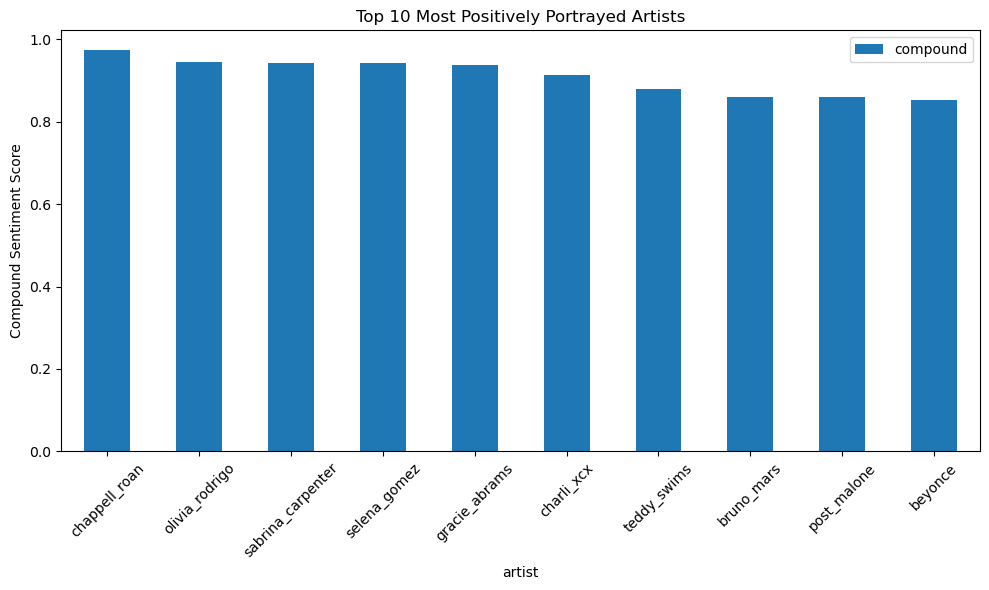

In [6]:
# Average sentiment per artist
artist_summary = df.groupby("artist")[["neg", "neu", "pos", "compound"]].mean().sort_values("compound", ascending=False)

print("\nAverage Sentiment by Artist:")
print(artist_summary)

# Optional: Add gender to summary
artist_summary["gender"] = df.groupby("artist")["gender"].first()

# Visualize top 10 most positive
top_10 = artist_summary.sort_values("compound", ascending=False).head(10)
top_10.plot(kind="bar", y="compound", figsize=(10,6), title="Top 10 Most Positively Portrayed Artists")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top 10 topics only

In [14]:
from collections import defaultdict, Counter
import pandas as pd
import os
import re
import nltk
import calendar
from tqdm import tqdm
from nltk.corpus import stopwords
from bertopic import BERTopic

nltk.download('stopwords')

# === CONFIGURATION ===
base_path = 'filtered_articles_2024'
artist_gender_map = {
    "kanye_west": "male", "sabrina_carpenter": "female", "kendrick_lamar": "male", "sza": "female",
    "drake": "male", "chappell_roan": "female", "post_malone": "male", "lady_gaga": "female",
    "benson_boone": "male", "billie_eilish": "female", "the_weeknd": "male", "gracie_abrams": "female",
    "teddy_swims": "male", "bad_bunny": "male", "ariana_grande": "female", "travis_scott": "male",
    "rihanna": "female", "beyonce": "female", "bruno_mars": "male", "taylor_swift": "female",
    "charli_xcx": "female", "justin_bieber": "male", "ed_sheeran": "male", "olivia_rodrigo": "female",
    "playboi_carti": "male", "selena_gomez": "female"
}

# === STOPWORDS ===
stop_words = set(stopwords.words('english'))
custom_stopwords = {
  "like", "yeah", "know", "dont", "really", "got", "say", "said", "just", "one", "also", "people", "thing", "stuff", "thats", 
  "im", "youre", "think", "get", "see", "going", "even", "make", "way", "back", "day", "something", "show", "come", "could, "would", 
  "police", "county", "adds", "kinder", "switch", "mode", "apr", "tie", "subscribe", "email", "reset", "password", "terms", "privacy", 
  "policy", "cookies", "instagram", "facebook", "youtube", "twitter", "click", "link", "account", "joker", "folie", "deux", "phillips",
    "arthur", "film", "phoenix", "ria", "mia", "olympics", "olympic", "biles", "paris", "ceremony", "chiles", "team", "games", "medal", 
    "gymnastics", "joaquin", "movie", "sequel", "wicked", "cynthia", "erivo", "elphaba", "glinda", "broadway", "musical", "oz", "wizard", 
    "students", "fafsa", "application", "aid", "class", "beeman", "university", "financial", "course", "access"}


month_stopwords = {month.lower() for month in calendar.month_name if month}
stop_words.update(custom_stopwords)
stop_words.update(month_stopwords)

name_parts = set()
for artist in artist_gender_map:
    parts = artist.split("_")
    name_parts.update(parts)
    name_parts.add(" ".join(parts))
stop_words.update(name_parts)

# === PREPROCESSING ===
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# === LOAD DOCUMENTS ===
def load_documents_by_gender(base_path, artist_gender_map):
    gender_docs = {'female': [], 'male': []}
    seen_docs = set()

    for artist_folder in tqdm(os.listdir(base_path)):
        artist_path = os.path.join(base_path, artist_folder)
        if not os.path.isdir(artist_path): continue
        gender = artist_gender_map.get(artist_folder, None)
        if gender not in ['male', 'female']: continue

        for file in os.listdir(artist_path):
            if file.endswith('.txt'):
                try:
                    with open(os.path.join(artist_path, file), 'r', encoding='utf-8') as f:
                        raw = f.read()
                        if len(raw.split()) < 50:
                            continue  # skip short articles
                        cleaned = preprocess(raw)
                        if cleaned.strip() and cleaned not in seen_docs:
                            seen_docs.add(cleaned)
                            gender_docs[gender].append(cleaned)
                except:
                    continue
    return gender_docs

gender_docs = load_documents_by_gender(base_path, artist_gender_map)

# === SHOW & EXPORT ARTICLES BY TOPIC ===
def show_and_export_articles_per_topic(model, topics, docs, label, output_path="output", max_articles=5):
    topic_to_docs = defaultdict(list)
    for doc, topic in zip(docs, topics):
        topic_to_docs[topic].append(doc)

    print(f"\n📄 Example articles per topic for {label.upper()}:\n")
    all_records = []

    for topic_id, doc_list in topic_to_docs.items():
        keywords = ", ".join([word for word, _ in model.get_topic(topic_id)[:10]])
        print(f"\n🧠 Topic {topic_id} ({keywords}) — showing {min(max_articles, len(doc_list))} example(s):\n")
        for i, doc in enumerate(doc_list[:max_articles]):
            print(f"[{i+1}] {doc[:300]}...\n")  # Show 1st 300 characters
        for doc in doc_list:
            all_records.append({
                "Topic": topic_id,
                "Top Words": keywords,
                "Article": doc
            })

    os.makedirs(output_path, exist_ok=True)
    out_file = os.path.join(output_path, f"{label.lower()}_articles_by_topic.csv")
    pd.DataFrame(all_records).to_csv(out_file, index=False)
    print(f"\n✅ Saved all articles with topic labels to: {out_file}")

# === RUN BERTopic FOR EACH GENDER ===
def analyze_by_gender(docs, label):
    print(f"\n🧠 Running BERTopic for {label.upper()} (max 10 topics)...")
    model = BERTopic(language="english", nr_topics=10, min_topic_size=15, verbose=True)
    topics, _ = model.fit_transform(docs)

    print(f"\n📊 Top topics for {label.upper()}:")
    top_ids = Counter(topics).most_common(10)
    for topic_id, count in top_ids:
        keywords = ", ".join([word for word, _ in model.get_topic(topic_id)[:10]])
        print(f"  Topic {topic_id}: {keywords}")

    show_and_export_articles_per_topic(model, topics, docs, label)
    return model

# === RUN ANALYSIS ===
female_model = analyze_by_gender(gender_docs['female'], "female")
male_model = analyze_by_gender(gender_docs['male'], "male")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saachisabnis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 25/25 [00:09<00:00,  2.71it/s]
2025-05-07 17:50:10,226 - BERTopic - Embedding - Transforming documents to embeddings.



🧠 Running BERTopic for FEMALE (max 10 topics)...


Batches:   0%|          | 0/225 [00:00<?, ?it/s]

2025-05-07 17:51:40,297 - BERTopic - Embedding - Completed ✓
2025-05-07 17:51:40,298 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-07 17:51:43,444 - BERTopic - Dimensionality - Completed ✓
2025-05-07 17:51:43,446 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-07 17:51:43,608 - BERTopic - Cluster - Completed ✓
2025-05-07 17:51:43,609 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-07 17:51:46,647 - BERTopic - Representation - Completed ✓
2025-05-07 17:51:46,652 - BERTopic - Topic reduction - Reducing number of topics
2025-05-07 17:51:46,670 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-07 17:51:49,244 - BERTopic - Representation - Completed ✓
2025-05-07 17:51:49,249 - BERTopic - Topic reduction - Reduced number of topics from 75 to 10



📊 Top topics for FEMALE:
  Topic 0: music, pm, best, album, new, turn, year, first, win, time
  Topic -1: ria, mia, song, album, new, kind, music, well, love, best
  Topic 1: fashion, new, hair, brand, black, petrilla, laura, red, says, look
  Topic 2: harris, trump, president, biden, campaign, election, kamala, us, vote, presidential
  Topic 3: kelce, chiefs, bowl, game, super, nfl, kansas, city, football, time
  Topic 4: wicked, cynthia, erivo, elphaba, glinda, film, broadway, musical, oz, wizard
  Topic 5: joker, folie, deux, phillips, arthur, film, phoenix, joaquin, movie, sequel
  Topic 6: olympics, olympic, biles, paris, ceremony, chiles, team, games, medal, gymnastics
  Topic 7: students, fafsa, application, aid, class, beeman, university, financial, course, access
  Topic 8: abortion, fund, missouri, funds, rodrigos, emergency, plan, reproductive, pills, guts

📄 Example articles per topic for FEMALE:


🧠 Topic 0 (music, pm, best, album, new, turn, year, first, win, time) — sho

2025-05-07 17:51:51,291 - BERTopic - Embedding - Transforming documents to embeddings.



✅ Saved all articles with topic labels to: output/female_articles_by_topic.csv

🧠 Running BERTopic for MALE (max 10 topics)...


Batches:   0%|          | 0/196 [00:00<?, ?it/s]

2025-05-07 17:53:09,497 - BERTopic - Embedding - Completed ✓
2025-05-07 17:53:09,505 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-07 17:53:14,421 - BERTopic - Dimensionality - Completed ✓
2025-05-07 17:53:14,431 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-07 17:53:14,677 - BERTopic - Cluster - Completed ✓
2025-05-07 17:53:14,680 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-05-07 17:53:18,887 - BERTopic - Representation - Completed ✓
2025-05-07 17:53:18,896 - BERTopic - Topic reduction - Reducing number of topics
2025-05-07 17:53:18,924 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-07 17:53:22,520 - BERTopic - Representation - Completed ✓
2025-05-07 17:53:22,531 - BERTopic - Topic reduction - Reduced number of topics from 78 to 10



📊 Top topics for MALE:
  Topic 0: bon, jovi, song, new, album, band, time, music, first, stage
  Topic -1: music, new, theatre, first, pm, time, us, john, program, jr
  Topic 1: game, season, team, two, patriots, players, first, games, last, league
  Topic 2: trump, president, election, biden, students, campaign, puerto, trumps, us, news
  Topic 3: city, cover, variant, coffee, manager, new, us, art, year, horror
  Topic 4: nike, release, jordan, adidas, sneaker, air, date, usd, price, buy
  Topic 5: peacock, cooper, olympic, games, olympics, paris, alex, nbcuniversal, twin, racing
  Topic 6: launch, space, delta, rocket, mission, nasa, iv, moon, ula, heavy
  Topic 7: mgm, debt, vegas, gambling, las, casino, brunos, million, resorts, residency
  Topic 8: ambani, wedding, anant, mumbai, radhika, guests, merchant, indian, ceremony, mukesh

📄 Example articles per topic for MALE:


🧠 Topic 0 (bon, jovi, song, new, album, band, time, music, first, stage) — showing 5 example(s):

[1] ticket